In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from flaml.autogen.agentchat2.code_interpreter import CodeInterpreterAgent
from flaml.autogen.agentchat2.llm_chat import LLMChatMessage, LLMChatContext
from flaml.autogen.agentchat2.stream import ListMessageStream

In [3]:
stream = ListMessageStream()

In [4]:
import os
os.makedirs("/tmp/gpt/working", exist_ok=True)
os.makedirs("/tmp/gpt/uploads", exist_ok=True)
os.makedirs("/tmp/gpt/images", exist_ok=True)

In [5]:
agent = CodeInterpreterAgent(
    name="code_interpreter",
    address="code_interpreter",
    message_stream=stream,
    llm_config={"temperature": 0.0, "model": "gpt-4"},
    working_dir="/tmp/gpt/working/",
    upload_dir="/tmp/gpt/uploads/",
    output_dir="/tmp/gpt/images/",
)

2023-08-06 02:51:56,097 DEBUG Add subscriber <flaml.autogen.agentchat2.code_interpreter.CodeInterpreterAgent object at 0x7f9735da9650> to address code_interpreter


In [6]:
stream.send(
    "code_interpreter",
    LLMChatMessage(
        "user",
        "user",
        "code_interpreter",
        "code_interpreter",
        {"role": "user", "content": "What is pi to the 20th digit?"},
    ),
    lambda address, agent: True,
)

2023-08-06 02:51:56,137 DEBUG Send
{'message': {'content': 'What is pi to the 20th digit?', 'role': 'user'},
 'receiver_address': 'code_interpreter',
 'receiver_name': 'code_interpreter',
 'sender_address': 'user',
 'sender_name': 'user'}
to address code_interpreter


In [7]:
stream.run()

2023-08-06 02:51:56,185 DEBUG [Private] code_interpreter: 
<OpenAIObject at 0x7f9735d7a390> JSON: {
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "Python_REPL",
    "arguments": "{\n  \"code\": \"import math\\n\\nf'{math.pi:.20f}'\"\n}"
  }
}
2023-08-06 02:51:56,186 DEBUG [Private] code_interpreter: executing Python_REPL({'code': "import math\n\nf'{math.pi:.20f}'"})...
2023-08-06 02:51:56,189 DEBUG [Private] code_interpreter: Python_REPL returned 3.14159265358979311600
2023-08-06 02:51:56,191 DEBUG [Private] code_interpreter: 
{'content': '"3.14159265358979311600"',
 'name': 'Python_REPL',
 'role': 'function'}
2023-08-06 02:51:56,206 DEBUG [Private] code_interpreter: 
<OpenAIObject at 0x7f9735d7bc50> JSON: {
  "role": "assistant",
  "content": "The value of pi to the 20th decimal place is 3.14159265358979311600."
}
2023-08-06 02:51:56,208 WARNING {'message': {'content': 'The value of pi to the 20th decimal place is '
                        '3.1415926535897

In [8]:
import pandas

df = pandas.read_csv("https://data.seattle.gov/api/views/2khk-5ukd/rows.csv?accessType=DOWNLOAD")
df

,Department,Last Name,First Name,Job Title,Hourly Rate
0,Sustainability & Environment,Cubillos,Sara,"StratAdvsr2,General Govt",60.33
1,Sustainability & Environment,Holt,Gemma,"Plng&Dev Spec,Sr-BU*",47.57
2,Police Department,Biondo,Barbara,Crime Prev Coord,43.34
3,Police Department,Ly,Thanh,Com Svc Ofcr,38.04
4,Police Department,Cooper,Joseph,Com Svc Ofcr Supv,43.46
...,...,...,...,...,...
12399,Seattle Dept of Transportation,LeFebre,Clara,"Civil Engrng Spec,Sr",57.87
12400,Seattle Dept of Transportation,Arifin,Anderson,"Civil Engr,Sr",67.49
12401,Seattle Dept of Transportation,Crosetto,Jessica,"Civil Engrng Spec,Assoc",51.32
12402,Seattle Dept of Transportation,Moimoi,Kepueli,"Civil Engrng Spec,Assoc",51.32


In [9]:
df.to_csv("/tmp/gpt/uploads/seattle_wage_data.csv", index=False)

In [10]:
stream.send(
    "code_interpreter",
    LLMChatMessage(
        "user",
        "user",
        "code_interpreter",
        "code_interpreter",
        {"role": "user", "content": "Can you take a look at the uploaded csv file: seattle_wage_data.csv"},
    ),
    lambda address, agent: True,
)
stream.send(
    "code_interpreter",
    LLMChatMessage(
        "user",
        "user",
        "code_interpreter",
        "code_interpreter",
        {"role": "user", "content": "Can you visualize the median hourly wage by department?"},
    ),
    lambda address, agent: True,
)

2023-08-06 02:51:57,470 DEBUG Send
{'message': {'content': 'Can you take a look at the uploaded csv file: '
                        'seattle_wage_data.csv',
             'role': 'user'},
 'receiver_address': 'code_interpreter',
 'receiver_name': 'code_interpreter',
 'sender_address': 'user',
 'sender_name': 'user'}
to address code_interpreter
2023-08-06 02:51:57,474 DEBUG Send
{'message': {'content': 'Can you visualize the median hourly wage by '
                        'department?',
             'role': 'user'},
 'receiver_address': 'code_interpreter',
 'receiver_name': 'code_interpreter',
 'sender_address': 'user',
 'sender_name': 'user'}
to address code_interpreter


2023-08-06 02:51:57,533 DEBUG [Private] code_interpreter: 
<OpenAIObject at 0x7f9735dc64b0> JSON: {
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "Python_REPL",
    "arguments": "{\n  \"code\": \"import pandas as pd\\n\\n# Load the data\\nwith open('/tmp/gpt/uploads/seattle_wage_data.csv', 'r') as file:\\n    df = pd.read_csv(file)\\n\\n# Check the first few rows of the dataframe\\ndf.head()\"\n}"
  }
}
2023-08-06 02:51:57,534 DEBUG [Private] code_interpreter: executing Python_REPL({'code': "import pandas as pd\n\n# Load the data\nwith open('/tmp/gpt/uploads/seattle_wage_data.csv', 'r') as file:\n    df = pd.read_csv(file)\n\n# Check the first few rows of the dataframe\ndf.head()"})...
2023-08-06 02:51:57,573 DEBUG [Private] code_interpreter: Python_REPL returned                      Department Last Name First Name  \
0  Sustainability & Environment  Cubillos       Sara   
1  Sustainability & Environment      Holt      Gemma   
2             Police Departme

2023-08-06 02:52:08,587 DEBUG [Private] code_interpreter: 
<OpenAIObject at 0x7f9735dc6ab0> JSON: {
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "Python_REPL",
    "arguments": "{\n  \"code\": \"import matplotlib.pyplot as plt\\nimport seaborn as sns\\n\\n# Calculate median hourly wage by department\\ndf_median_wage = df.groupby('Department')['Hourly Rate '].median().sort_values(ascending=False)\\n\\n# Create a bar plot\\nplt.figure(figsize=(10, 8))\\nsns.barplot(y=df_median_wage.index, x=df_median_wage.values, orient='h')\\nplt.xlabel('Median Hourly Wage')\\nplt.ylabel('Department')\\nplt.title('Median Hourly Wage by Department')\\n\\n# Save the plot\\nplt.savefig('/tmp/gpt/images/median_hourly_wage_by_department.png')\\n\\n'/tmp/gpt/images/median_hourly_wage_by_department.png'\"\n}"
  }
}
2023-08-06 02:52:08,589 DEBUG [Private] code_interpreter: executing Python_REPL({'code': "import matplotlib.pyplot as plt\nimport seaborn as sns\n\n# Calculate median h

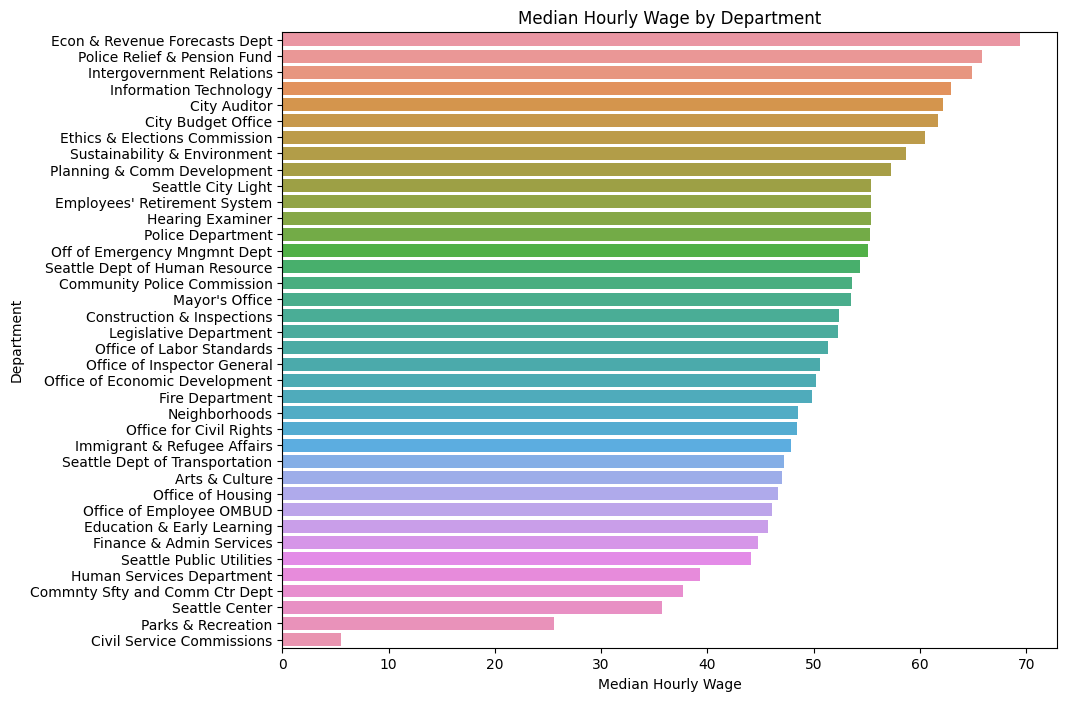

In [11]:
stream.run()